# LAB 2_1: Hebbian Learning

Load the data 
- rows are input dimensions
- columns are different input patterns

In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
import itertools

from learning_rules import HebbianLearning

In [2]:
dset = pd.read_csv('./lab2_1_data.csv', header=None).to_numpy()#.squeeze()

dset

array([[ 0.74589  ,  0.43352  ,  0.34667  ,  0.43563  ,  0.87224  ,
         0.91057  ,  0.53584  ,  0.34912  ,  0.54057  ,  0.46997  ,
         0.70024  ,  0.77378  ,  0.82682  ,  0.14546  ,  0.68834  ,
         0.35971  ,  0.81554  ,  0.48447  ,  0.29453  ,  0.64096  ,
         0.45428  ,  0.63494  ,  0.37933  ,  0.23349  ,  0.90886  ,
         0.43876  ,  0.33963  ,  0.41841  ,  0.42219  ,  0.25524  ,
         0.5083   ,  0.84596  ,  0.14035  ,  0.39587  ,  0.63698  ,
         0.3541   ,  0.68447  ,  0.33946  ,  0.55213  ,  0.79272  ,
         0.63809  , -0.0045443,  0.58915  ,  0.71341  ,  0.11595  ,
         0.40112  ,  0.42337  ,  0.58805  ,  0.49308  ,  0.85059  ,
        -0.35406  , -0.50244  , -0.62183  , -0.605    , -0.95938  ,
        -0.72244  , -0.49166  , -0.37627  , -0.82959  , -0.64601  ,
        -0.37979  , -0.61365  , -0.9602   ,  0.077495 , -0.26028  ,
        -0.71718  , -0.94404  , -0.41195  , -0.71242  , -0.62871  ,
        -0.10829  , -0.56198  , -0.19394  , -0.5

Text(0.5, 1.0, 'Scatterplot of data distribution')

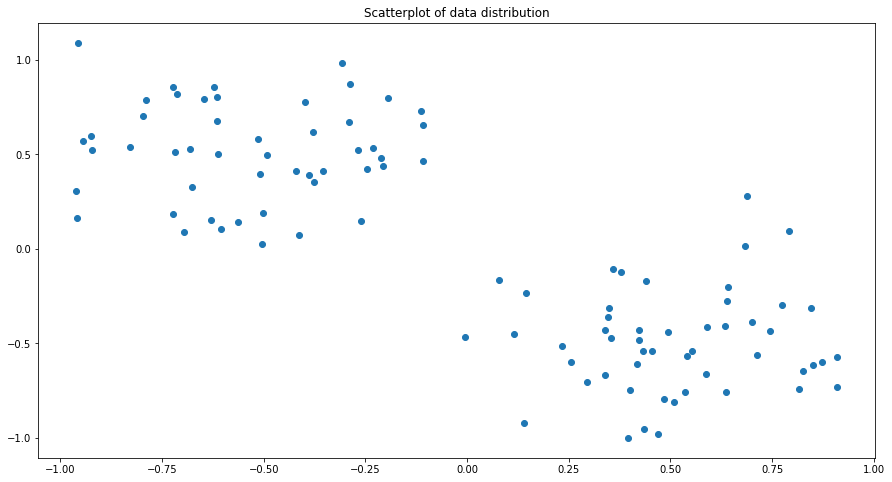

In [3]:
plt.figure(figsize=(15,8))
plt.scatter(*dset)
plt.title('Scatterplot of data distribution')

## Assignment 1: Basic Hebbian Learning

In [4]:
np.random.seed()

epochs=200
threshold = 0.000001

In [5]:
def training(hl, rule, data):#, rule_choice):
    w = hl.w_init
    w_set=[]
    for i in range(epochs):
        data = data[:, np.random.permutation(data.shape[1])]
        w_old = w
        for j in range(data.shape[1]):
            u=data[:,j]
            v=np.dot(u,w) 
            w = rule(u, v, w)
            # if rule_choice == "basic":
            #     w = rule.hebbian_rule(u, v, w)
            # if rule_choice == "oja":
            #     w = rule.oja_rule(u, v, w, alpha)
            #plot
            w_set.append(w)
        if i>2 and linalg.norm(w-w_old) < threshold:
            print("Number of epochs runned:", i+1)
            break  
        return w_set      

In [6]:
hl=HebbianLearning()
h_rule = hl.hebbian_rule
basic_hl_W=training(hl, h_rule, dset)

final_w=basic_hl_W[-1]
print('Final results for w:', final_w)

Final results for w: [-0.38229728 -0.27464792]


After training is completed plot a figure displaying (on the same graph) the training data points (points in the bidimensional space), the final weight vector w resulting from the learning process and the principal eigenvector of input correlation matrix Q.

In [7]:
def princ_comp(dset):
        #input correlation matrix
        Q = np.cov(dset.T)
        #ensure the matrix is symmetric (robustness)
        # Q = (Q + Q.T) / 2
        #principal eigenvector of Q
        eigenvalues, eigenvectors = np.linalg.eig(Q)
        principal_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
        return Q, principal_eigenvector



In [8]:
Q, pc=princ_comp(dset)

In [9]:
def plot_eig(ax, dset, final_w, pc): 
    # plot the training data points
    ax.scatter(*dset, label='Training data points')
    # plot the final weight vector
    ax.quiver(final_w[0], final_w[1], color='purple', label='Final weight vector') #angles='xy', scale_units='xy', scale=1,
    # Plot the principal eigenvector
    ax.quiver(pc[0], pc[1], color='blue', label='Principal eigenvector') #angles='xy', scale_units='xy', scale=1,
    ax.legend()
    # ax.set_title('Training Data, Final Weight Vector, and Principal Eigenvector')
    plt.show()


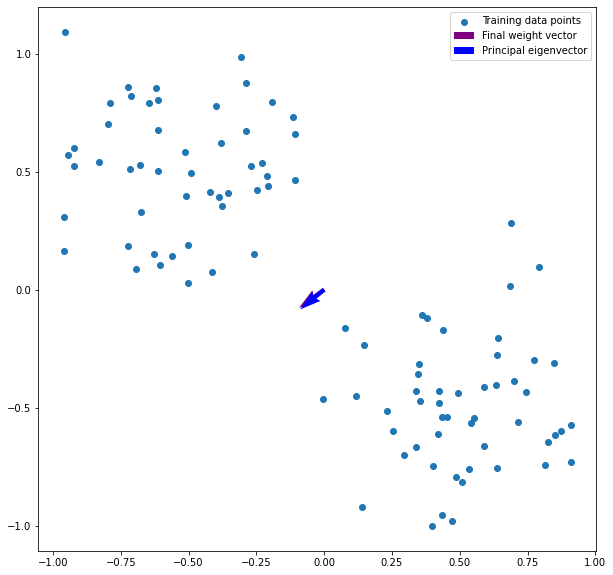

In [10]:
plt.figure(figsize=(10, 10))
plot_eig(plt, dset, final_w, pc)

Generate two figures plotting the evolution in time of the two components of the weight vector _w_. The plot will have time on the _x_ axis, and the weight value on the _y_ axis (provide a separate plot for each component of the weight vector).

Finally, provide another plot of the evolution in time of
the norm of the weight vector during training. 

_Note: in this point, 3 plots are required_

In [11]:
def multiplot(dset, w_set, title):
    #instatiate the plot grid
    plt.figure(figsize=(15, 15))
    plt.suptitle(title)
    
    steps = list(range(len(w_set))) 
    
    #1st PLOT: first component of W
    first = [w[0] for w in w_set]
    ax = plt.subplot(3, 2, 1)
    ax.grid(True)
    ax.set_title('First component of W')
    ax.plot(steps, first)
    ax.set_xlabel('Time')
    ax.set_ylabel('W[0]')

    #2nd PLOT: second component of W
    second = [w[1] for w in w_set]
    ax = plt.subplot(3, 2, 2)
    ax.grid(True)
    ax.set_title('Second component of W')
    ax.plot(steps, second)
    ax.set_xlabel('Time')
    ax.set_ylabel('W[1]')

    #3rd PLOT: norm of W evolution
    ax = plt.subplot(3, 2, 3)
    ax.grid(True)
    ax.set_title('Evolution of weight norm in training')
    norms = [np.linalg.norm(w) for w in w_set]
    ax.plot(steps, norms)
    ax.set_xlabel('Time')
    ax.set_ylabel('|W|')

    #4th (last) PLOT: final weights, eigenvalues, data 
    ax = plt.subplot(3, 2, 4)
    ax.grid(True)
    ax.set_title('Final weights and PC with data')
    plot_eig(ax, dset, final_w, pc)
    
    plt.savefig(str('plots/'+(title.replace(" ", "_")).lower()+'.jpeg'), edgecolor='black', dpi=400, transparent=True)



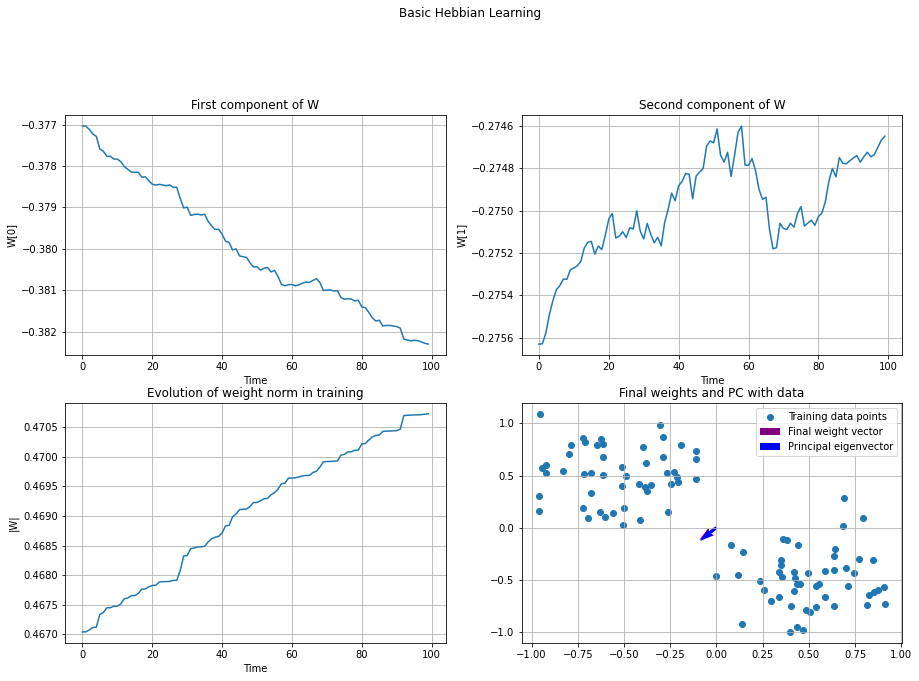

<Figure size 432x288 with 0 Axes>

In [12]:
multiplot(dset, basic_hl_W, "Basic Hebbian Learning")

## Assignment 2: Oja rule

Final weights with alpha= 1 [-4.25573253e-41  6.80774873e-41]


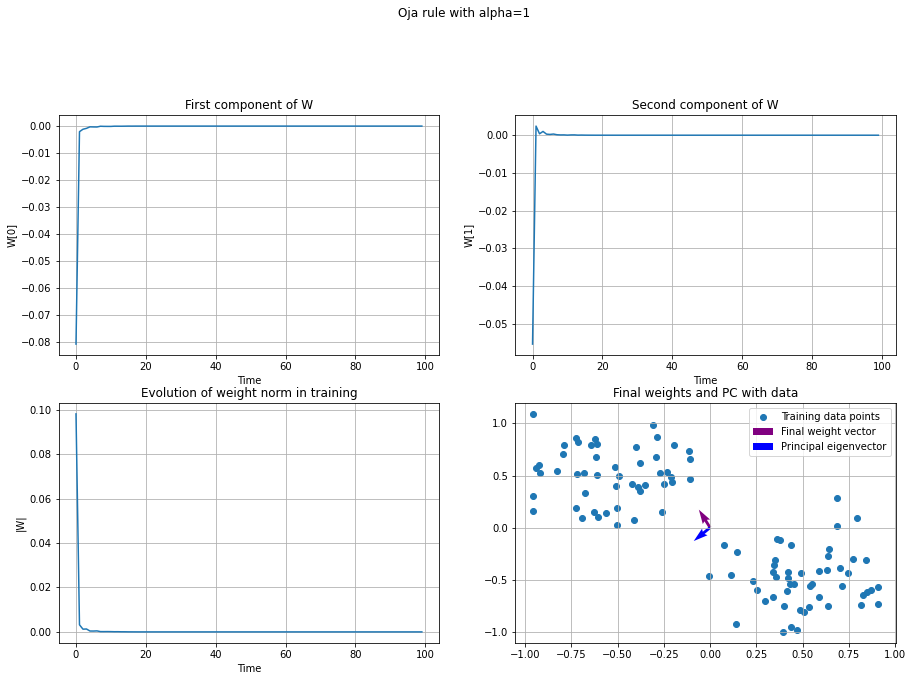

Final weights with alpha= 0.5 [ 5.37211924e-36 -1.05636019e-35]


<Figure size 432x288 with 0 Axes>

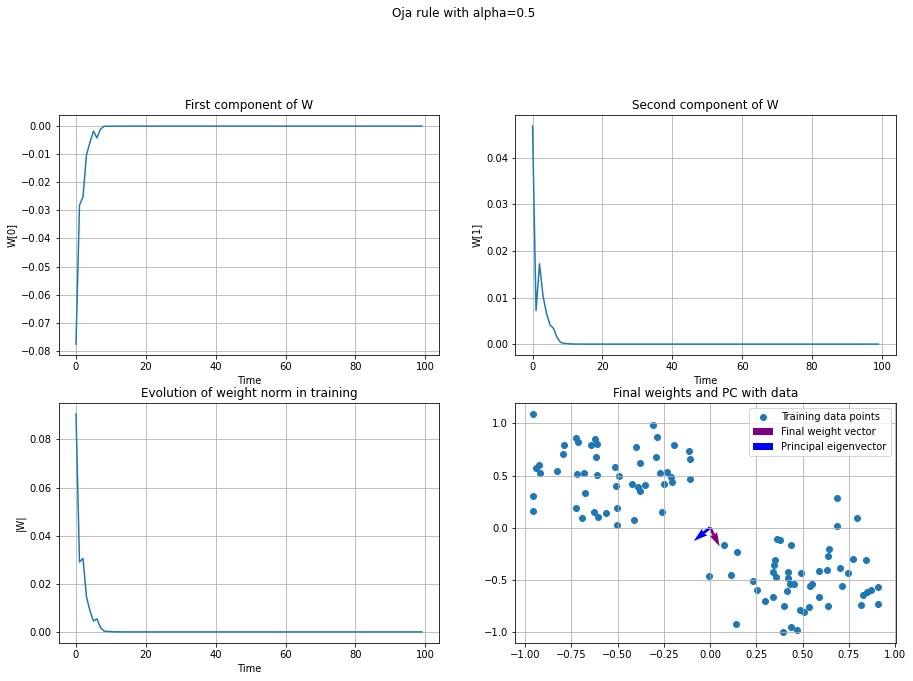

Final weights with alpha= 0.3 [-5.55447305e-35  9.45796992e-36]


<Figure size 432x288 with 0 Axes>

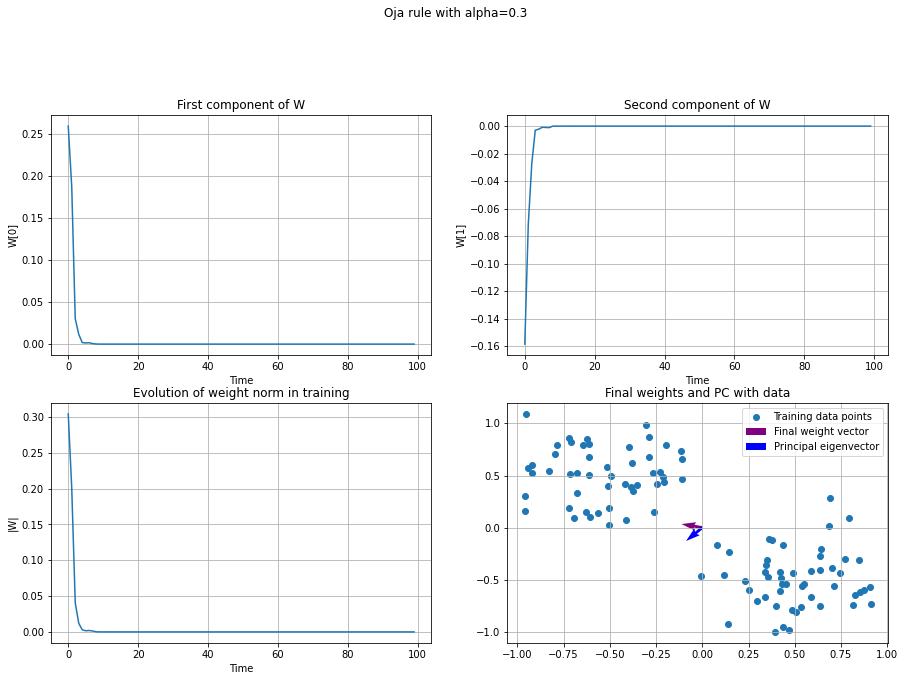

Final weights with alpha= 0.01 [-1.64510741e-37  1.46274031e-37]


<Figure size 432x288 with 0 Axes>

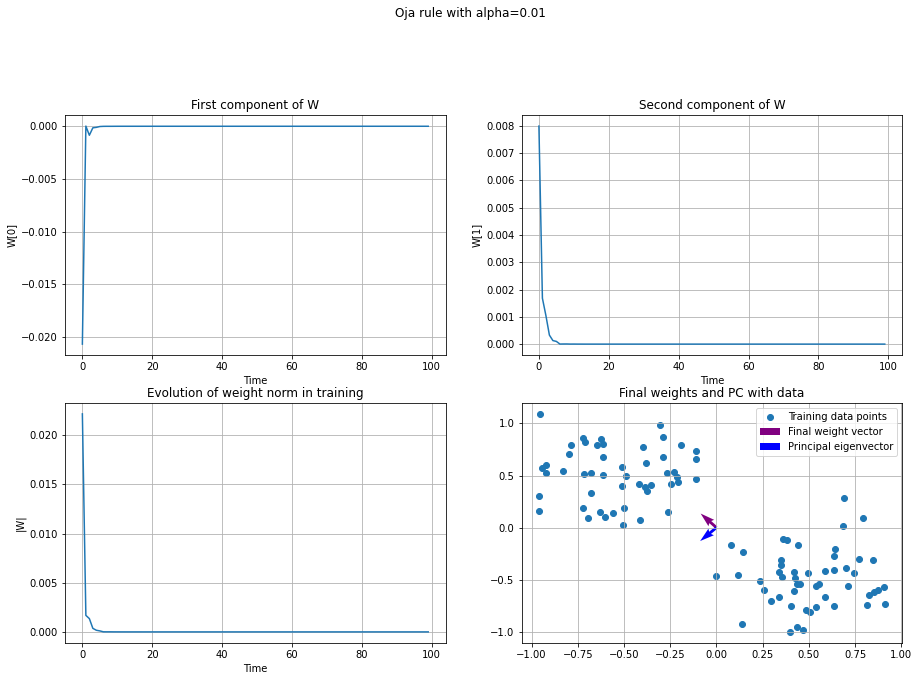

Final weights with alpha= 0.001 [-3.50737563e-37  5.99787120e-37]


<Figure size 432x288 with 0 Axes>

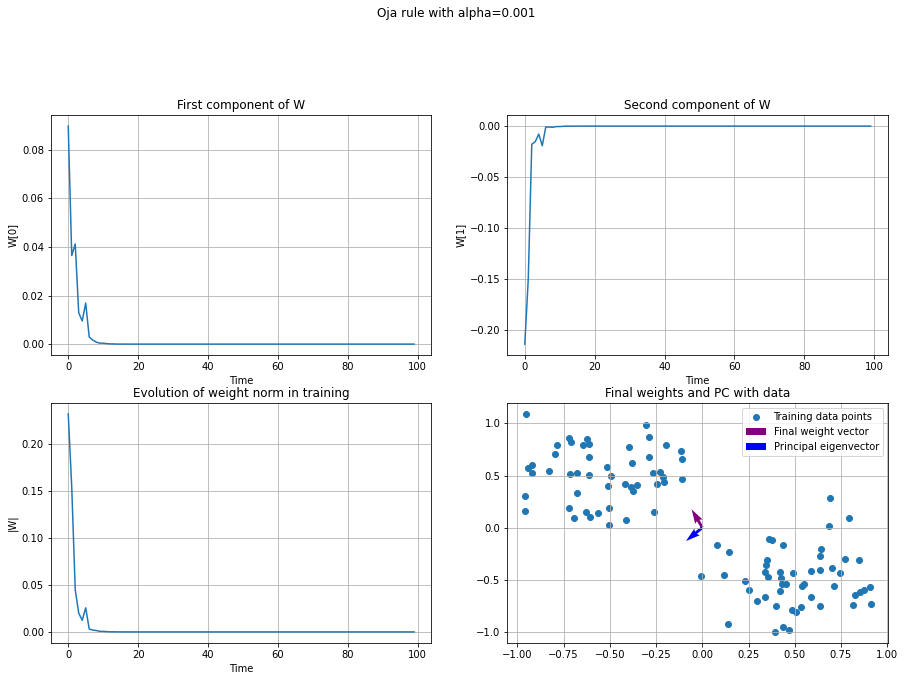

<Figure size 432x288 with 0 Axes>

In [13]:
# hl=HebbianLearning()
alpha=[1, 0.5, 0.3, 0.01, 0.001]
for a in alpha:
    hl=HebbianLearning(alpha=a)
    h_rule = hl.oja_rule
    oja_W = training(hl, h_rule, dset)#, 'basic')

    final_w=oja_W[-1]
    print('Final weights with alpha=', +a, final_w)
    multiplot(dset, oja_W, f"Oja rule with alpha={a}")

## Assignment 3: Subtractive normalization rule

Final weights: [ 5.34476003e-35 -5.34476003e-35]


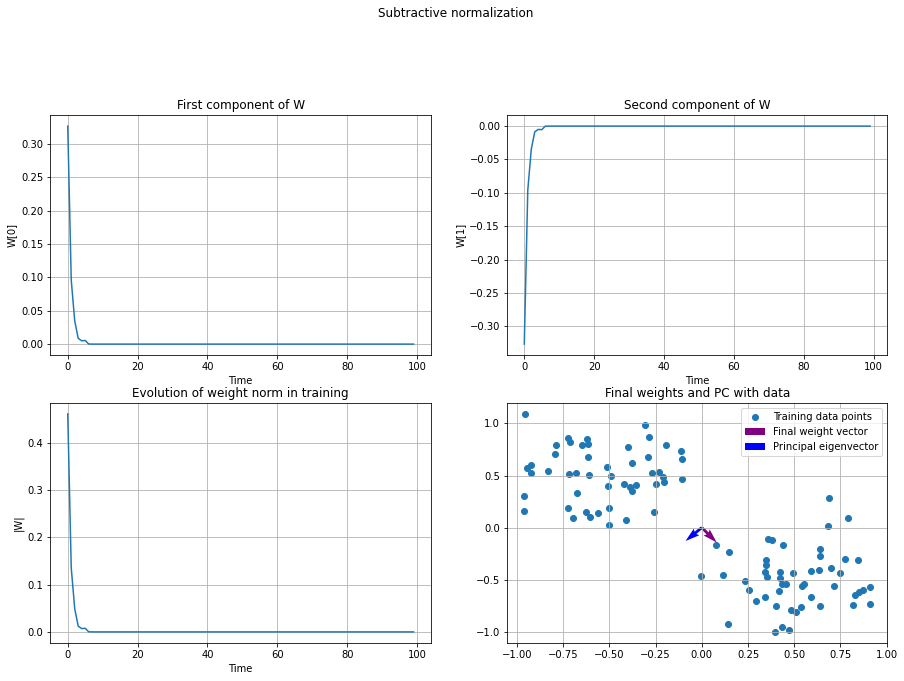

<Figure size 432x288 with 0 Axes>

In [14]:
hl=HebbianLearning(one=np.ones(dset.shape[0]))
h_rule = hl.sub_norm
subnorm_W=training(hl, h_rule, dset)

final_w=subnorm_W[-1]
print('Final weights:', final_w)
multiplot(dset, subnorm_W, "Subtractive normalization")

## Bonus track 1: BCM rule

## Bonus track 2: Covariance rule